<a href="https://colab.research.google.com/github/chrisZerv/Analyse-Deaths-involving-Police-in-the-United-States/blob/main/Fatal_Force.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 57.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
# Check the shape (rows, columns) of each DataFrame
print("Shape of Median Household Income DataFrame:", df_hh_income.shape)
print("Shape of Poverty Rate DataFrame:", df_pct_poverty.shape)
print("Shape of High School Completion DataFrame:", df_pct_completed_hs.shape)
print("Shape of Racial Demographics DataFrame:", df_share_race_city.shape)
print("Shape of Fatalities DataFrame:", df_fatalities.shape)

Shape of Median Household Income DataFrame: (29322, 3)
Shape of Poverty Rate DataFrame: (29329, 3)
Shape of High School Completion DataFrame: (29329, 3)
Shape of Racial Demographics DataFrame: (29268, 7)
Shape of Fatalities DataFrame: (2535, 14)


In [6]:
# Check the column names for each DataFrame
print("\nColumn names in Median Household Income DataFrame:", df_hh_income.columns)
print("Column names in Poverty Rate DataFrame:", df_pct_poverty.columns)
print("Column names in High School Completion DataFrame:", df_pct_completed_hs.columns)
print("Column names in Racial Demographics DataFrame:", df_share_race_city.columns)
print("Column names in Fatalities DataFrame:", df_fatalities.columns)


Column names in Median Household Income DataFrame: Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Column names in Poverty Rate DataFrame: Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Column names in High School Completion DataFrame: Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Column names in Racial Demographics DataFrame: Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Column names in Fatalities DataFrame: Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [7]:
# Check for any missing (NaN) values in each DataFrame
print("\nNaN values in Median Household Income DataFrame:\n", df_hh_income.isnull().sum())
print("NaN values in Poverty Rate DataFrame:\n", df_pct_poverty.isnull().sum())
print("NaN values in High School Completion DataFrame:\n", df_pct_completed_hs.isnull().sum())
print("NaN values in Racial Demographics DataFrame:\n", df_share_race_city.isnull().sum())
print("NaN values in Fatalities DataFrame:\n", df_fatalities.isnull().sum())


NaN values in Median Household Income DataFrame:
 Geographic Area     0
City                0
Median Income      51
dtype: int64
NaN values in Poverty Rate DataFrame:
 Geographic Area    0
City               0
poverty_rate       0
dtype: int64
NaN values in High School Completion DataFrame:
 Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64
NaN values in Racial Demographics DataFrame:
 Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64
NaN values in Fatalities DataFrame:
 id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illn

In [8]:
# Check for any duplicates in each DataFrame
print("\nDuplicate rows in Median Household Income DataFrame:", df_hh_income.duplicated().sum())
print("Duplicate rows in Poverty Rate DataFrame:", df_pct_poverty.duplicated().sum())
print("Duplicate rows in High School Completion DataFrame:", df_pct_completed_hs.duplicated().sum())
print("Duplicate rows in Racial Demographics DataFrame:", df_share_race_city.duplicated().sum())
print("Duplicate rows in Fatalities DataFrame:", df_fatalities.duplicated().sum())


Duplicate rows in Median Household Income DataFrame: 0
Duplicate rows in Poverty Rate DataFrame: 0
Duplicate rows in High School Completion DataFrame: 0
Duplicate rows in Racial Demographics DataFrame: 0
Duplicate rows in Fatalities DataFrame: 0


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [9]:
# Fill NaN values in Median Household Income DataFrame with 0 (or alternatively, you could drop them)
df_hh_income['Median Income'].fillna(0, inplace=True)


# Fill NaN values in Fatalities DataFrame
# Substitute 'armed', 'flee', and 'body_camera' with 'Unknown' if missing
df_fatalities['armed'].fillna('Unknown', inplace=True)
df_fatalities['flee'].fillna('Unknown', inplace=True)

# For 'age', it may make more sense to fill missing values with the median age
median_age = df_fatalities['age'].median()
df_fatalities['age'].fillna(median_age, inplace=True)

# Fill NaN values in 'race' with 'Unknown'
df_fatalities['race'].fillna('Unknown', inplace=True)


In [10]:
print("NaN values in Median Household Income DataFrame:\n", df_hh_income.isnull().sum())
print("NaN values in Fatalities DataFrame:\n", df_fatalities.isnull().sum())

NaN values in Median Household Income DataFrame:
 Geographic Area    0
City               0
Median Income      0
dtype: int64
NaN values in Fatalities DataFrame:
 id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [12]:
# Replace any problematic characters and convert the poverty_rate to numeric
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')

# Drop rows where the poverty_rate could not be converted to a number (NaN values)
df_pct_poverty_cleaned = df_pct_poverty.dropna(subset=['poverty_rate'])

# Group by 'Geographic Area' to get the average poverty rate per state
poverty_by_state = df_pct_poverty_cleaned.groupby('Geographic Area')['poverty_rate'].mean().reset_index()

# Sort the states by poverty rate from highest to lowest
poverty_by_state_sorted = poverty_by_state.sort_values(by='poverty_rate', ascending=False)


<ipython-input-16-e650451fe129>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='poverty_rate', y='Geographic Area', data=poverty_by_state_sorted, palette='coolwarm')


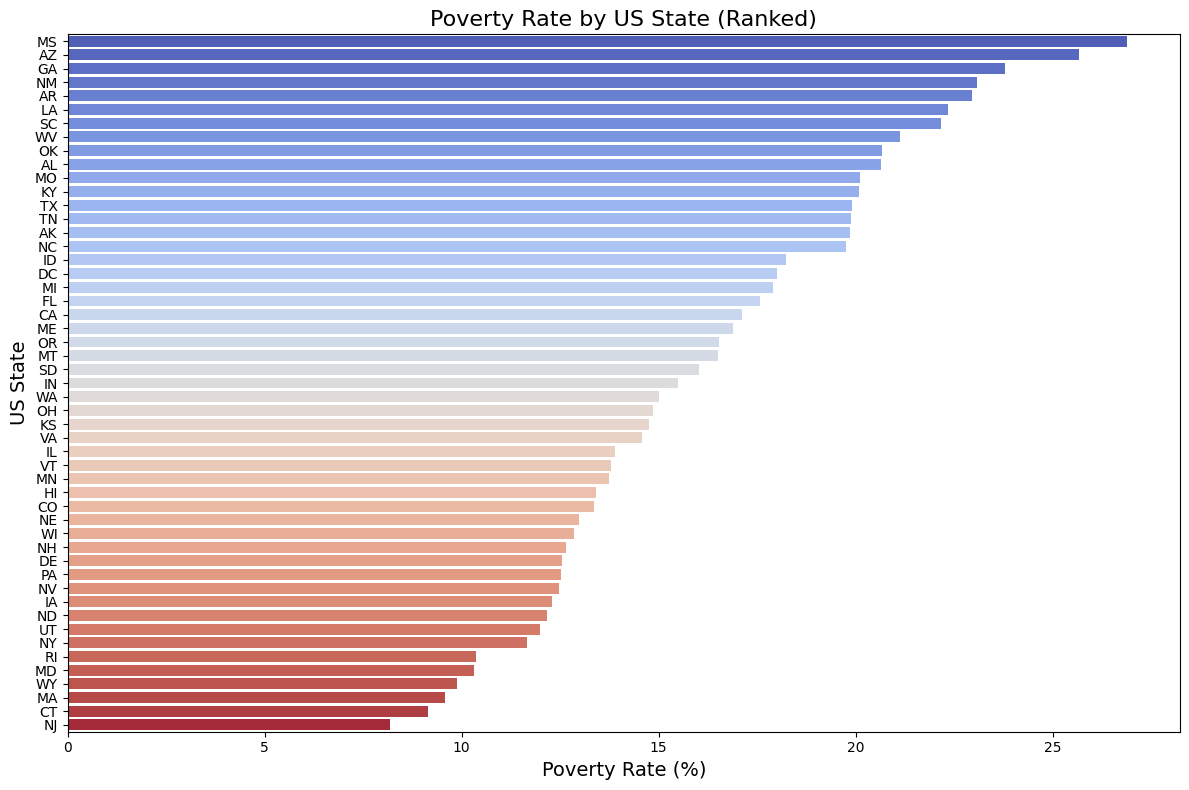

The state with the highest poverty rate is MS with a rate of 26.9%.
The state with the lowest poverty rate is NJ with a rate of 8.19%.


In [16]:
plt.figure(figsize=(12, 8))

# Create the barplot using seaborn
sns.barplot(x='poverty_rate', y='Geographic Area', data=poverty_by_state_sorted, palette='coolwarm')

# Add labels and title
plt.title('Poverty Rate by US State (Ranked)', fontsize=16)
plt.xlabel('Poverty Rate (%)', fontsize=14)
plt.ylabel('US State', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

# Find the states with highest and lowest poverty rates
highest_poverty_state = poverty_by_state_sorted.iloc[0]
lowest_poverty_state = poverty_by_state_sorted.iloc[-1]

# Output the results
print(f"The state with the highest poverty rate is {highest_poverty_state['Geographic Area']} with a rate of {highest_poverty_state['poverty_rate']:.3}%.")
print(f"The state with the lowest poverty rate is {lowest_poverty_state['Geographic Area']} with a rate of {lowest_poverty_state['poverty_rate']:.3}%.")

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

<ipython-input-20-814e1fa26d88>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='percent_completed_hs', y='Geographic Area', data=hs_graduation_by_state_sorted, palette='coolwarm')


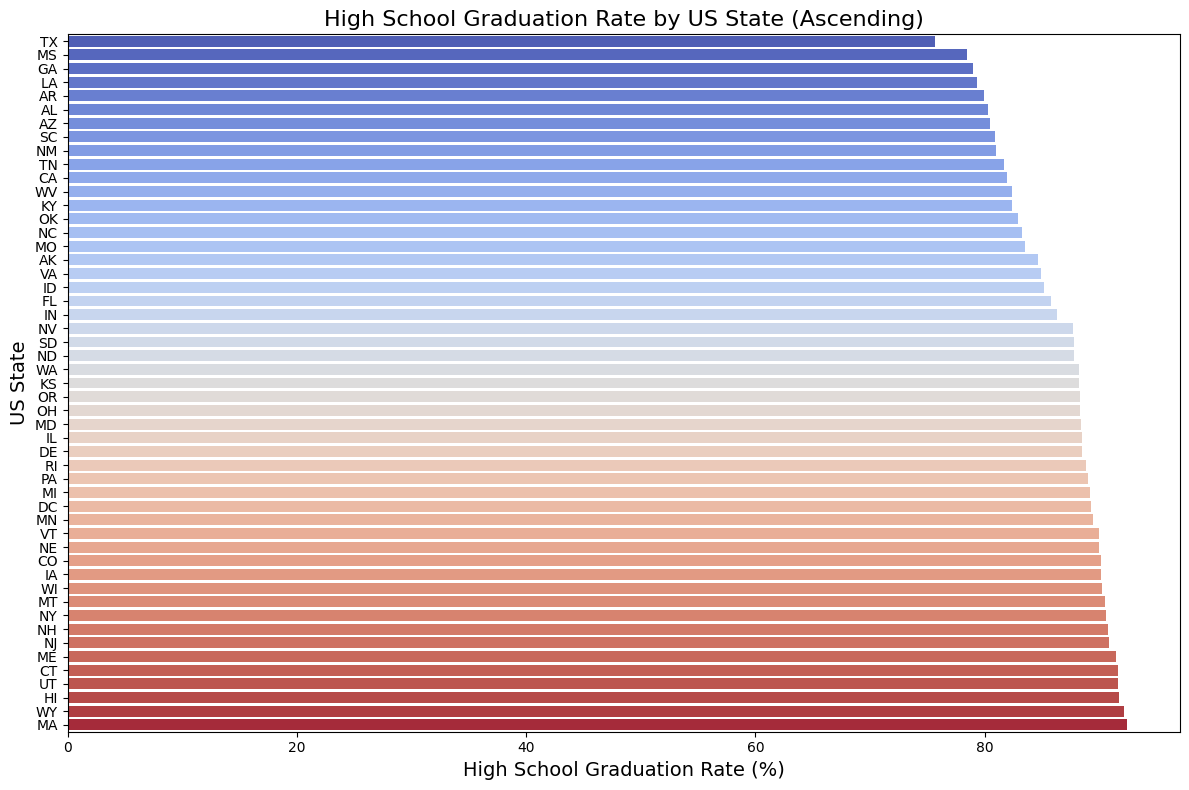

The state with the lowest high school graduation rate is TX with a rate of 75.7%.
The state with the highest high school graduation rate is MA with a rate of 92.4%.


In [20]:
# Convert the percent_completed_hs column to numeric and clean invalid data
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')

# Drop rows where percent_completed_hs could not be converted to a number (NaN values)
df_pct_completed_hs_cleaned = df_pct_completed_hs.dropna(subset=['percent_completed_hs'])

# Group by 'Geographic Area' to get the average high school completion rate per state
hs_graduation_by_state = df_pct_completed_hs_cleaned.groupby('Geographic Area')['percent_completed_hs'].mean().reset_index()

# Sort the states by high school completion rate in ascending order
hs_graduation_by_state_sorted = hs_graduation_by_state.sort_values(by='percent_completed_hs', ascending=True)

# Set up the figure size for plotting
plt.figure(figsize=(12, 8))

# Create the barplot using seaborn
sns.barplot(x='percent_completed_hs', y='Geographic Area', data=hs_graduation_by_state_sorted, palette='coolwarm')

# Add labels and title
plt.title('High School Graduation Rate by US State (Ascending)', fontsize=16)
plt.xlabel('High School Graduation Rate (%)', fontsize=14)
plt.ylabel('US State', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

# Find the states with the highest and lowest high school graduation rates
lowest_graduation_state = hs_graduation_by_state_sorted.iloc[0]
highest_graduation_state = hs_graduation_by_state_sorted.iloc[-1]

# Output the results
print(f"The state with the lowest high school graduation rate is {lowest_graduation_state['Geographic Area']} with a rate of {lowest_graduation_state['percent_completed_hs']:.3}%.")
print(f"The state with the highest high school graduation rate is {highest_graduation_state['Geographic Area']} with a rate of {highest_graduation_state['percent_completed_hs']:.3}%.")


# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

Create a seperate KDE plot for each race. Is there a difference between the distributions?

# Race of People Killed

Create a chart that shows the total number of people killed by race.

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).